# Parts of Speech and Meaning (English Only)
## Exploring awesome features offered by WordNet

In [1]:
text = "Cyprus, officially the Republic of Cyprus, is an island country in the Eastern Mediterranean and the third largest and third most populous island in the Mediterranean. Cyprus is located south of Turkey, west of Syria and Lebanon, northwest of Israel, north of Egypt, and southeast of Greece. Cyprus is a major tourist destination in the Mediterranean. With an advanced, high-income economy and a very high Human Development Index, the Republic of Cyprus has been a member of the Commonwealth since 1961 and was a founding member of the Non-Aligned Movement until it joined the European Union on 1 May 2004. On 1 January 2008, the Republic of Cyprus joined the eurozone."

## 1. Tokenization

In [2]:
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(text.lower())
sentences

['cyprus, officially the republic of cyprus, is an island country in the eastern mediterranean and the third largest and third most populous island in the mediterranean.',
 'cyprus is located south of turkey, west of syria and lebanon, northwest of israel, north of egypt, and southeast of greece.',
 'cyprus is a major tourist destination in the mediterranean.',
 'with an advanced, high-income economy and a very high human development index, the republic of cyprus has been a member of the commonwealth since 1961 and was a founding member of the non-aligned movement until it joined the european union on 1 may 2004. on 1 january 2008, the republic of cyprus joined the eurozone.']

In [57]:
tokens = word_tokenize(sentences[2])
tokens

['cyprus',
 'is',
 'a',
 'major',
 'tourist',
 'destination',
 'in',
 'the',
 'mediterranean',
 '.']

## POS Tagging
Here's the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) tags and descriptions. 

In [58]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('cyprus', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('major', 'JJ'),
 ('tourist', 'NN'),
 ('destination', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mediterranean', 'NN'),
 ('.', '.')]

**If you'd like to see the documentation for a tag:**

In [6]:
import nltk.help
nltk.help.upenn_tagset('NN') # documentation for NN, which is a noun

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## 3. Word Senses (for homonyms)
Homonyms are two or more words having the same spelling or pronunciation but different meanings and origins. A simple example of a homonym is the word "pen". This can mean both "a holding area for animals" and "a writing tool".

[WordNet](https://wordnet.princeton.edu/) is a large English dictionary in the form of a [semantic graph](http://davidvandegrift.com/blog?id=62), a.k.a semantic networks. FYI: A linguist named Tom De Smedt created a lexicon ([en-sentiment.xml](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml)) where he also manually assigned adjective words with polarity and subjectivity values.

WordNet groups English words into sets of synonyms called synsets. It provides short definitions and usage examples, and records a number of relations among these synonym sets or their members.

NLTK provides an interface to the WordNet API.

### WordNet is just another NLTK corpus reader

### Synset
A synset is a set of synonyms that share a common meaning.
Look up a word using `synsets()`; this function has an optional pos argument which lets you constrain the part of speech of the word. A synset is identified with a 3-part name of the form: `word.pos.nn`

In [7]:
from nltk.corpus import wordnet as wn
wn.synsets('human')

[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

In [8]:
wn.synsets('human')[0].definition()

'any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage'

In [9]:
wn.synsets('human')[1].definition()

'characteristic of humanity'

In [10]:
wn.synsets('human')[2].definition()

'relating to a person'

In [11]:
wn.synsets('human')[3].definition()

'having human form or attributes as opposed to those of animals or divine beings'

In [13]:
human = wn.synsets('Human', pos=wn.NOUN)[0] # Set human to be the first homonym which is a noun
human

Synset('homo.n.02')

### Hypernym
A hypernym is a word with a broad meaning constituting a category into which words with more specific meanings fall; a superordinate. For example, color is a hypernym of red.

In [14]:
human.hypernyms() 

[Synset('hominid.n.01')]

### Hyponym
A hyponym is a word of more specific meaning than a general or superordinate term applicable to it. For example, spoon is a hyponym of cutlery.

In [15]:
human.hyponyms() 

[Synset('homo_erectus.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('homo_sapiens.n.01'),
 Synset('homo_soloensis.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('rhodesian_man.n.01'),
 Synset('world.n.08')]

In [21]:
bike = wn.synsets('bicycle')
bike

[Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [20]:
girl = wn.synsets('girl')
girl

[Synset('girl.n.01'),
 Synset('female_child.n.01'),
 Synset('daughter.n.01'),
 Synset('girlfriend.n.02'),
 Synset('girl.n.05')]

In [22]:
synonyms = []
for syn in wn.synsets('girl'):
    for lemma in syn.lemmas(): #  A lemma is basically the dictionary form or base form of a word, as opposed to the various inflected forms of a word. 
        synonyms.append(lemma.name())
synonyms

['girl',
 'miss',
 'missy',
 'young_lady',
 'young_woman',
 'fille',
 'female_child',
 'girl',
 'little_girl',
 'daughter',
 'girl',
 'girlfriend',
 'girl',
 'lady_friend',
 'girl']

### Similarity (Wu-Palmer metric)
The Wu-Palmer metric (WUP) is a measure of similarity based on distance in the semantic graph. There are many other metrics too.

In [18]:
bike.wup_similarity(human) 

0.34782608695652173

In [19]:
girl.wup_similarity(human)

0.5217391304347826

In [23]:
synonyms = []
for syn in wn.synsets('girl'):
    for lemma in syn.lemmas(): #  A lemma is basically the dictionary form or base form of a word, as opposed to the various inflected forms of a word. 
        synonyms.append(lemma.name())
synonyms

['girl',
 'miss',
 'missy',
 'young_lady',
 'young_woman',
 'fille',
 'female_child',
 'girl',
 'little_girl',
 'daughter',
 'girl',
 'girlfriend',
 'girl',
 'lady_friend',
 'girl']

### Antonyms

In [24]:
antonyms = []
for syn in wn.synsets("girl"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
antonyms

['male_child', 'boy', 'son', 'boy']

## 4. Chunking and Entity Recognition
The goal of chunking is to divide a sentence into chunks. Usually each chunk contains a **head** and optionally, additionally words and modifiers. Examples of chunks include noun groups and verb groups.

In [25]:
from nltk.chunk import RegexpParser

In order to create a chunker, we need to first define a chunk grammar, consisting of rules that indicate how sentences should be chunked.

We can define a simple grammar for a noun phrase (`NP`) chunker with a single regular-expression rule. This rule says that a `NP` chunk should be formed whenever the chunker finds an optional determiner (`DT`) followed by any number of adjectives (`JJ`) and then a noun (`NN`).

Note how grammatical structures which are not noun phrases are not chunked, which is totally fine:

In [27]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

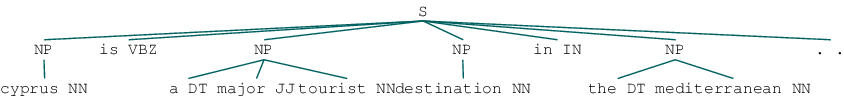

In [35]:
chunker = RegexpParser(grammar)
result = chunker.parse(tags)
result

### Named Entity Recognition [[documentation](https://www.nltk.org/book/ch07.html#named-entity-recognition)]
The goal of entity recognition is to detect entities such as Person, Location, Time, etc.

[Here](https://www.nltk.org/book/ch07.html#tab-ne-types) is a list of the most commonly used types of named entities:
* ORGANIZATION
* PERSON
* LOCATION
* DATE
* TIME
* MONEY
* PERCENT
* FACILITY
* GPE

They should be self-explanatory, except for
1. "Facility": human-made artifacts in the domains of architecture and civil engineering; and 
2. "GPE": geo-political entities such as city, state/province, and country.

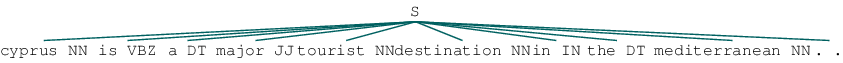

In [60]:
from nltk.chunk import ne_chunk # ne = named entity
ne_chunk(tags)

In [61]:
ne_chunk(tags).pprint()

(S
  cyprus/NN
  is/VBZ
  a/DT
  major/JJ
  tourist/NN
  destination/NN
  in/IN
  the/DT
  mediterranean/NN
  ./.)


Note ne_chunk was unable to detect any entities in our sentence. That is because it is quite limited.

**Let's try a different sentence.**

In [65]:
from nltk.corpus import treebank

tb = treebank
sent = treebank.tagged_sents()[22]
sent

[('The', 'DT'),
 ('U.S.', 'NNP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('few', 'JJ'),
 ('industrialized', 'VBN'),
 ('nations', 'NNS'),
 ('that', 'WDT'),
 ('*T*-7', '-NONE-'),
 ('does', 'VBZ'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('a', 'DT'),
 ('higher', 'JJR'),
 ('standard', 'NN'),
 ('of', 'IN'),
 ('regulation', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('smooth', 'JJ'),
 (',', ','),
 ('needle-like', 'JJ'),
 ('fibers', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('crocidolite', 'NN'),
 ('that', 'WDT'),
 ('*T*-1', '-NONE-'),
 ('are', 'VBP'),
 ('classified', 'VBN'),
 ('*-5', '-NONE-'),
 ('as', 'IN'),
 ('amphobiles', 'NNS'),
 (',', ','),
 ('according', 'VBG'),
 ('to', 'TO'),
 ('Brooke', 'NNP'),
 ('T.', 'NNP'),
 ('Mossman', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('professor', 'NN'),
 ('of', 'IN'),
 ('pathlogy', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Vermont', 'NNP'),
 ('College', 'NNP'),
 ('of', 'IN'),
 ('Medicine', 'NNP'),
 ('.', '

In [66]:
print(ne_chunk(sent))

(S
  The/DT
  (GPE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (PERSON Brooke/NNP T./NNP Mossman/NNP)
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (PERSON Vermont/NNP College/NNP)
  of/IN
  (GPE Medicine/NNP)
  ./.)


This time it detected a few named entiies such as the `U.S.` as a `GPE` and `Brooke` as a `Person`. 
However it incorrectly identified `Vermont College` as a `Person`.